## Digital Audio Feature Extraction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn

In [20]:
# using some of the mall muzak we manipulated
audio = '/Volumes/S200408/backup/S190813/Coding/wav_utilities/wav_utilities/tools/manipulated_wav/monofile.wav'
y, sr = librosa.load(audio)

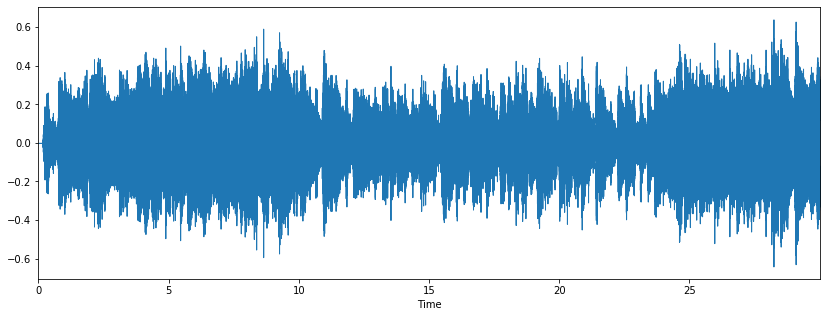

In [21]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

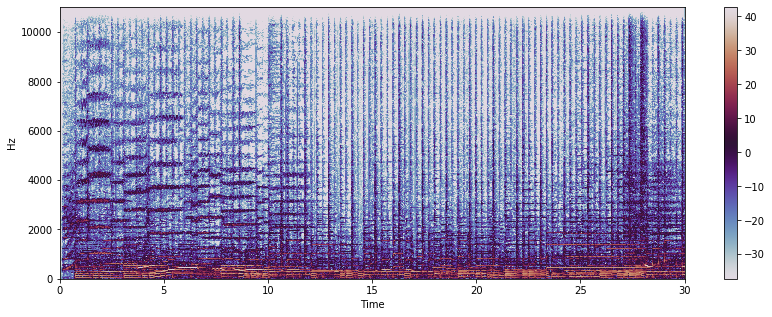

In [22]:
# Short Term Fourier Transform
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, 
                        sr=sr, 
                        x_axis='time', 
                        y_axis='hz', 
                        cmap='twilight')
plt.colorbar()

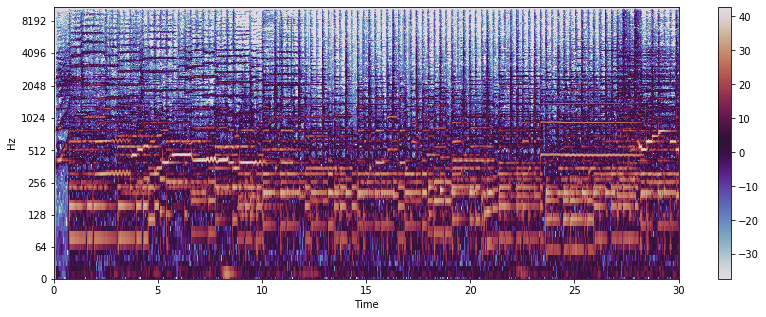

In [23]:
# setting spectrograph to log in order to better distinguish the frequencies
plt.figure(figsize=(14, 5))   
librosa.display.specshow(Xdb, 
                        sr=sr, 
                        x_axis='time', 
                        y_axis='log',
                        cmap='twilight')                    
plt.colorbar()

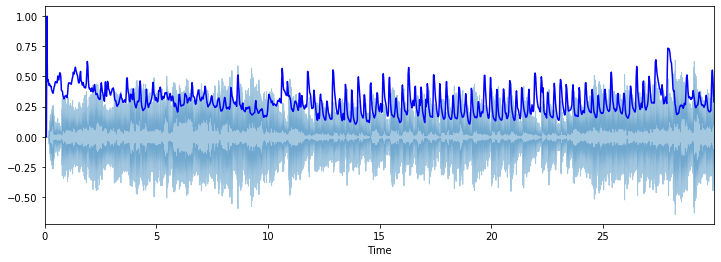

In [24]:
# extracting spectral centroid for each frame 
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

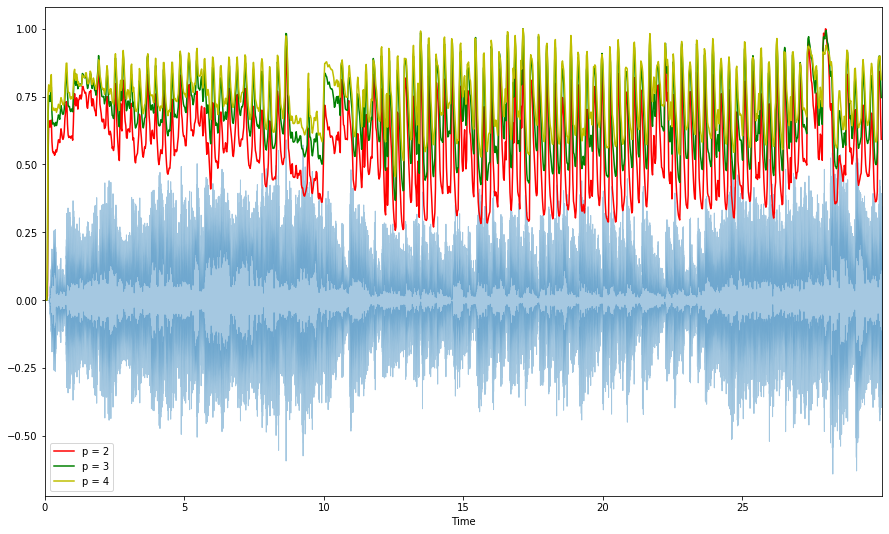

In [25]:
# extracting spectral bandwidth for each frame
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))


(20, 1292)


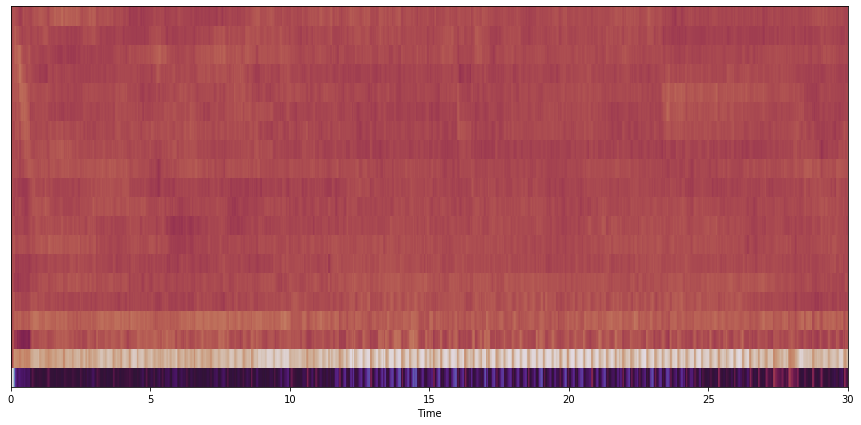

In [27]:
# extracting Mel-Frequency Cepstral Coefficients
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, 
                        sr=sr, 
                        x_axis='time', 
                        cmap='twilight')

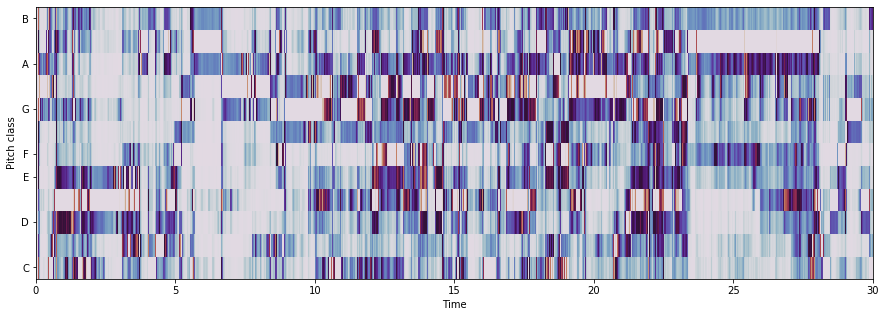

In [30]:
# extracting Chroma Features
chromagram = librosa.feature.chroma_stft(y, 
                                        sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, 
                        x_axis='time', 
                        y_axis='chroma', 
                        cmap='twilight')
